In [1]:
import math # math is used to perform some computations like factorial or binomial coefficient
from scipy import stats  # library for stats stuff, for example random variables
import numpy as np # library for scientific computing (dealing with arrays)
import matplotlib.pyplot as plt # library to plot

# Some notes on functions in python (and many programming languages)
We have often used functions to manipulate variables and obtain some output (for example, `np.mean(x)` that returns the mean of a vector x).

Usually, functions have some mandatory arguments that always need to be there, otherwise python will complain (in the `np.mean()` example, one vector argument is compulsory otherwise python does not know on what it should compute the mean).

Often times, functions have some extra **arguments** that can be specified or not. If you don't specify them, they will assume a **default** **value**. For example, if you use `np.mean(x)` on a matrix `x` (instead of a vector), you might want to specify if you want to compute the mean over the whole matrix or if you want to return the mean of each column or row. To specify this, you can use the extra argument `axis` inside the function:

- `np.mean(x, axis=0)` returns the mean over columns
- `np.mean(x, axis=1)` returns the mean over rows
- `np.mean(x)` if you don't specify axis, python will use the default value `None` to return the mean over all the elements. Equivalently, you could write `np.mean(x, axis=None)`

The non compulsory arguments will always appear with their keyword (in this case, `axis=`) inside the function.

How can you find out all the arguments that you can specify? In the **documentation** of the function! for the mean, here: https://numpy.org/doc/2.0/reference/generated/numpy.mean.html. Just under the name of the function you see `numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)`: the first argument `a` does not have a keyword, and in fact it is the compulsory one. All other arguments appear with the keyword (for example, `axis`) and the value next to the keyword is the default one. If you read the Parameters section just below you will understand which values the arguments can take to achieve great things with your functions!

# 3) Minimum and maximum of a set of iid random variables
Let $X_1,\dots,X_n$ be independent discrete uniform random variables on $\{1,\dots,N\}$.

a) Find the pmf of $\min(X_1,\dots,X_n)$

b) Find the pmf of $\max(X_1,\dots,X_n)$

The rationale of the exercise is the following.
We want to compute the pmf of the minimum, which means that we want to find the probabilities of all the values that the minimum can take (the minimum can take values 1...N).

As usual, to obtain the empirical probabilities we will store the frequencies of each realisation of the minimum, i.e. we want to keep track of how many times the minimum took value 1, how many times it took value 2,... how many times it took value N. We will store these values in a vector `count_min` of size $N$, where entry $k$ of `count_min` represents how many times the minimum took value $k$.

Therefore, the for loop that repeats the experiment a `num_experiment` of times will repeat the following steps:

1.   we sample a vector $x=(x_1,\dots,x_n)$ of length $n$
2.   we compute the minimum of $x$ and call it $k$
3.   we increment `count_min[k-1]` of 1 (it is `k-1` and not `k` only because the indexes of python go from 0 to `N-1` instead of `1` to `N`.

In [2]:
n = 20
N = 10
num_experiment = 100

X = stats.randint(1, N+1) # define the discrete uniform distribution

In [3]:
count_min = np.zeros(N) # in position k of the vector we will store how many times the minimum took value k

for i in range(num_experiment):
  x = X.rvs(n) # sample from the n random variables X_1...X_n
  k = np.min(x) # compute the minimum of x, we call its value k
  count_min[k-1] += 1 # increment of 1 count_min in position k-1 (the -1 is there because in the experiment k takes values 1...N but the indexes in Python go from 0 to N-1)

In [4]:
empirical_pdf = count_min/num_experiment # we want to go from counts to probabilities so we divide by the number of experiments
print('empirical', empirical_pdf)

theoretical_pdf = np.zeros(N) # theoretical values (see slides)
for k in range(1, N+1):
  theoretical_pdf[k-1] = ((N-k+1)**n - (N-k)**n) / (N**n)
print('theory', theoretical_pdf)

# let's compute the approximation error by computing the element-wise difference of the vectors empirical_pdf and theoretical_pdf
# (they are both of size N), then take the absolute value of each element using np.abs() and finally sum all the elements using np.sum()
print('absolute difference of the empirical and theoretical pmf', np.sum(np.abs(empirical_pdf - theoretical_pdf)))

empirical [0.87 0.11 0.02 0.   0.   0.   0.   0.   0.   0.  ]
theory [8.78423345e-01 1.10047440e-01 1.07312924e-02 7.61361079e-04
 3.56079101e-05 9.42679200e-07 1.09602484e-08 3.48573583e-11
 1.04857500e-14 1.00000000e-20]
absolute difference of the empirical and theoretical pmf 0.018537415233815267


**Another possible solution**

This way of solving the exercise is not different from what we were doing in the last weeks, the only difference being that instead of fixing a value $k$ and computing the probability of the minimum = $k$ this time we want to do it for all possible values $k$ that the minimum can take - this is why we need a vector `count_min` of size `N` instead of a counter of size 1.

If you are not conviced, another possible way of doing it can be saving all the values that the minimum takes in the experiments and then, a posterior, counting how many times the minimum takes each value. I write here this solution. The two solutions are absolutely equivalent and you can pick whatever you think is easier, but this second one has one for loop in addition.

In [13]:
result_experiments = np.zeros(num_experiment) # initialise a vector of size num_experiment where we will save the value of the minimum at each iteration

for i in range(num_experiment):
  x = X.rvs(n) # sample from the n random variables X_1...X_n
  result_experiments[i] = np.min(x)

# now we need to produce the frequencies of each value by checking how many times result_experiments took each value k
count_min = np.zeros(N)
for k in range(N):
  count_min[k] = np.sum(result_experiments == k+1) # again we need k as index and k+1 as value because of the discrepancy between python's index convention 0...N-1
  # and our experiment results 1...N

**Our first plot in python: bar plot**

Printing the vectors is not so clear, so we will use a visual way to check the difference between the empirical and the theoretical pmf.

The bar plot in Python (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) is a possible visualisation tool.
To use it, you need to `import matplotlib.pyplot as plt` and then call `plt.bar(x, y)` with `x,y` the desired values. Other arguments that go into the function are `alpha` which specifies the degree of transparency (between 0 and 1, by default 1) and `label` if we want to identify the two bar plots with a different label (since we do define the bar plots one after the other, python automatically chooses diffent colours. If we want to specify another colour, we can do so with the argument `color`). If we specify a label, we need to call `plt.legend()` so that the legend shows on the plot. Finally, we use `plt.show()` to make the plot appear.

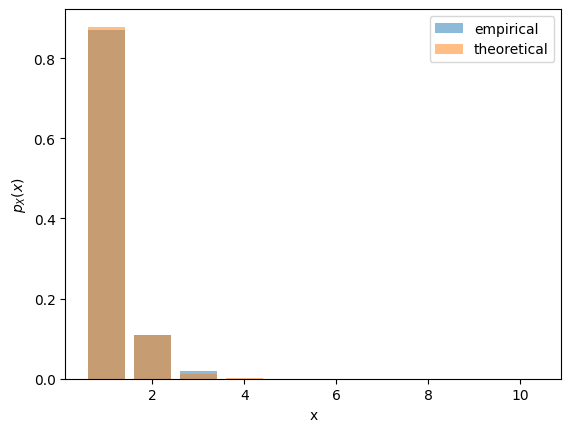

In [14]:
plt.bar(np.arange(1, N+1), empirical_pdf, alpha=0.5, label='empirical')
# np.arange(1, N+1) is the pythonic way of definying a vector of natural numbers from 1 to N
# we want to specify alpha<1 which enforces transparency in the colors, otherwise we would not distinguish the two colors.
plt.bar(np.arange(1, N+1), theoretical_pdf, alpha=0.5, label='theoretical')
plt.xlabel('x')
plt.ylabel('$p_X(x)$') # the $ $ specifies that you are writing in a formula accoring to the latex syntax. You can remove the $$, no big deal.
plt.legend()
plt.show()

**Esthetically pleasing extra**: we might be annoyed at the overlap between the two categories which makes the plot not so neat. One possibility would be to shrink the width of the bars by using the argument `width` (to take a number between 0 and 1, with default = 1) and then shift by the same number the x values of the second bar plot. See below how to how to achieve it.

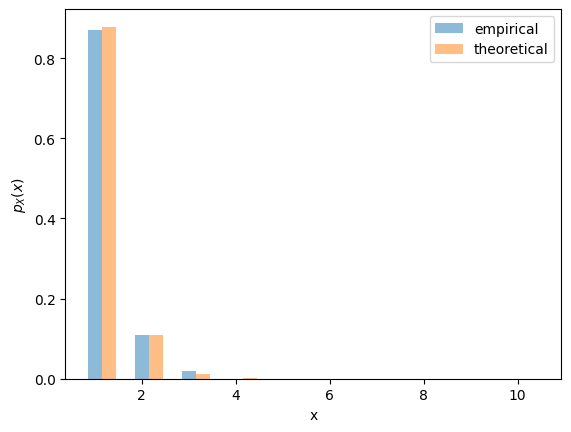

In [12]:
plt.bar(np.arange(1, N+1), empirical_pdf, width=0.3, alpha=0.5, label='empirical')
# np.arange(1, N+1) is the pythonic way of definying a vector of natural numbers from 1 to N
# we want to specify alpha<1 which enforces transparency in the colors, otherwise we would not distinguish the two colors.
plt.bar(np.arange(1, N+1)+0.3, theoretical_pdf, width=0.3, alpha=0.5, label='theoretical')
plt.xlabel('x')
plt.ylabel('$p_X(x)$') # the $ $ specifies that you are writing in a formula accoring to the latex syntax
plt.legend()
plt.show()

**Same but for the maximum**

In [82]:
count_max = np.zeros(N)

for i in range(num_experiment):
  x = X.rvs(n)
  k = np.max(x)
  count_max[k-1] += 1

In [83]:
empirical_pdf = count_max/num_experiment
print('empirical', empirical_pdf)

theoretical_pdf = np.zeros(N)
for k in range(1, N+1):
  theoretical_pdf[k-1] = (k/N)**n - ((k-1)/N)**n
print('theory', theoretical_pdf)

print('absolute difference of the empirical and theoretical pmf', np.sum(np.abs(empirical_pdf - theoretical_pdf)))

empirical [0.   0.   0.   0.   0.   0.   0.   0.   0.13 0.87]
theory [1.00000000e-20 1.04857500e-14 3.48573582e-11 1.09602484e-08
 9.42679200e-07 3.56079101e-05 7.61361079e-04 1.07312924e-02
 1.10047440e-01 8.78423345e-01]
absolute difference of the empirical and theoretical pmf 0.03990512091099829


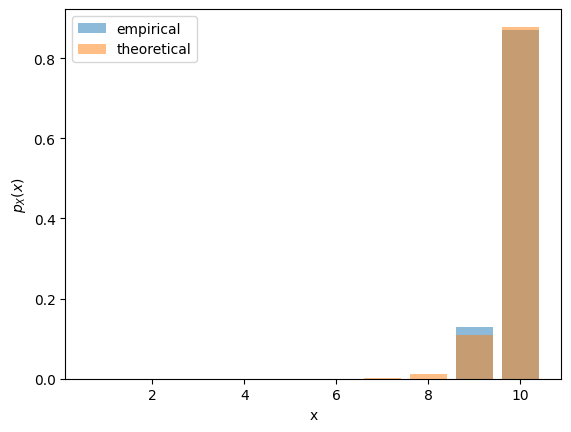

In [84]:
plt.bar(np.arange(1, N+1), empirical_pdf, alpha=0.5, label='empirical')
plt.bar(np.arange(1, N+1), theoretical_pdf, alpha=0.5, label='theoretical')
plt.legend()
plt.xlabel('x')
plt.ylabel('$p_X(x)$') # the $ $ specifies that you are writing in a formula accoring to the latex syntax
plt.show()

# 4) Independence of random variables computing joint pmf and marginals
You have a coin with probability $p$ of showing H. You flip the coin a random number $N$ of times, where $N\sim Pois(\lambda)$ and is independent of the outcome of the flips. Find the distribution of $X$ number of H and $Y$ number of T and show that $X,Y$ are independent.

In [33]:
num_experiment = 10000
p = 0.4
l = 5
# if I need to store the joint counts I need a matrix instead of a vector, where in entry x, y you have how many times you observed (X=x, Y=y)
# (this is as in the joint pmf table that we saw during the lectures, but with counts instead of probabilities)
# The issue here is that a priori I don't know which values X and Y can take,
# so for now the (imperfect) solution that we will take is to define a matrix bigger than what we might empirically observe
# (how big depends on the parameter of the Poisson)
max_n = 50 # if N is a poisson(5), the probability of sampling a value bigger than 50 is very low
count_XY = np.zeros((max_n, max_n)) # define a square matrix of zeros of size max_n, max_n
count_X = np.zeros(max_n) # we use the same size for the marginals of X and Y, which will be vectors
count_Y = np.zeros(max_n)

N = stats.poisson(l) # number of tosses are poisson distributed
for i in range(num_experiment):
  n = N.rvs(1) # sample the number of tosses
  if n < max_n + 1: # if n is bigger than our threshold we discard it (if we have chosen well the boundary this will happen with very small probability)
    X = stats.binom(n, p) # number of heads is a binomial(n, p)
    x = X.rvs(1) # sample the number of heads
    y = n-x # number of tails follows straightforwardly
    count_XY[x, y] += 1 # increment of 1 the counts of joint X, Y
    count_X[x] += 1 # increment counts of X
    count_Y[y] += 1 # increment counts of Y

# let's transform counts into probabilities
p_XY = count_XY / num_experiment
p_X = count_X / num_experiment
p_Y = count_Y / num_experiment

# to verify that p_XY factorises in p_X * p_Y we need to compute the outer product of the marginals. In python, this is done with np.outer( , )
p_Xp_Y = np.outer(p_X, p_Y)
# you can verify that the shape of the result is the desired one (max_n, max_n):
print(p_Xp_Y.shape)

In [34]:
# let's see if the absolute distance of the distributions is small enough
np.sum(np.abs(p_XY - p_Xp_Y)) # the difference between matrices is computed element wise, then we apply the absolute value to all the elements,
# and finally we sum all the elements to obtain a scalar number

-1.4474099002681484e-17

How could you represent with a plot the joint and marginals?